In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from sklearn.preprocessing import Normalizer

In [2]:
df = pd.read_csv("data.csv")
names = list(df)

In [4]:
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.text(i, y_list[i], y_list[i], size=16)

In [5]:
num_yes = len(df[df['Bankrupt?'] == 1])
num_no = len(df[df['Bankrupt?'] == 0])

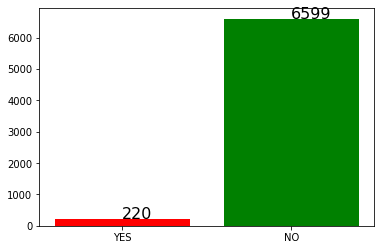

In [6]:
plt.bar(['YES', 'NO'], [num_yes, num_no], color=['red', 'green'])
add_value_label(['YES', 'NO'], [num_yes, num_no])

# Normalize data

In [7]:
arr = df.iloc[:,1:].to_numpy()  # bez kolumny "Bankrupt?"

# sklearn.preprocessing.Normalizer działa na wierszach, dlatego transponujemy arr
arr = np.swapaxes(arr, 0, 1)
normalizer = Normalizer().fit(arr)

In [8]:
arr_norm = normalizer.transform(arr)
arr_norm = np.swapaxes(arr_norm, 0, 1)

In [9]:
data_norm = pd.DataFrame(arr_norm, columns=names[1:])
data_norm.insert(0, "Bankrupt?", df.iloc[:,0])

In [10]:
suspicious_cols = [' Operating Expense Rate',
                   ' Research and development expense rate',
                   ' Interest-bearing debt interest rate',
                   ' Revenue Per Share (Yuan ¥)',
                   ' Net Value Growth Rate',
                   ' Current Ratio',
                   ' Quick Ratio',
                   ' Total debt/Total net worth',
                   ' Accounts Receivable Turnover',
                   ' Average Collection Days',
                   ' Inventory Turnover Rate (times)',
                   ' Fixed Assets Turnover Frequency',
                   ' Revenue per person',
                   ' Allocation rate per person',
                   ' Quick Assets/Current Liability',
                   ' Cash/Current Liability',
                   ' Inventory/Current Liability',
                   ' Long-term Liability to Current Assets',
                   ' Current Asset Turnover Rate',
                   ' Quick Asset Turnover Rate',
                   ' Cash Turnover Rate',
                   ' Fixed Assets to Assets',
                   ' Total assets to GNP price'
                  ]
len(suspicious_cols)

23

# Remove suspicious columns

In [14]:
names_subset = set(names).difference(set(suspicious_cols))

In [12]:
names_subset.remove(' Total Asset Growth Rate')
names_subset.remove(' Net Income Flag')  # all companies have value=1
df_bool = df[list(names_subset)] < 1000
df_clean = df[list(names_subset)][df_bool.all(axis=1)]
df_clean

,CFO to Assets,Current Liabilities/Equity,ROA(A) before interest and % after tax,Total Asset Turnover,Inventory and accounts receivable/Net value,Net Income to Stockholder's Equity,Long-term fund suitability ratio (A),Per Share Net profit before tax (Yuan ¥),Cash Flow to Total Assets,Operating profit per person,...,Non-industry income and expenditure/revenue,Equity to Liability,After-tax net Interest Rate,Interest Coverage Ratio (Interest expense to EBIT),Quick Assets/Total Assets,Net Worth Turnover Rate (times),Contingent liabilities/Net worth,Bankrupt?,After-tax Net Profit Growth Rate,Net worth/Assets
0,0.520382,0.339077,0.424389,0.086957,0.398036,0.827890,0.005024,0.138736,0.637555,0.392913,...,0.302646,0.016469,0.808809,0.564050,0.166673,0.032903,0.006479,1,0.688979,0.792424
1,0.567101,0.329740,0.538214,0.064468,0.397725,0.839969,0.005059,0.169918,0.641100,0.391590,...,0.303556,0.020794,0.809301,0.570175,0.127236,0.025484,0.005835,1,0.689693,0.828824
2,0.538491,0.334777,0.499019,0.014993,0.406580,0.836774,0.005100,0.142803,0.642765,0.381968,...,0.302035,0.016474,0.808388,0.563706,0.340201,0.013387,0.006562,1,0.689463,0.792484
3,0.604105,0.331509,0.451265,0.089955,0.397925,0.834697,0.005047,0.148603,0.579039,0.378497,...,0.303350,0.023982,0.808966,0.564663,0.161575,0.028065,0.005366,1,0.689110,0.848535
4,0.578469,0.330726,0.538432,0.175412,0.400079,0.839973,0.005303,0.168412,0.622374,0.394371,...,0.303475,0.035490,0.809304,0.575617,0.260330,0.040161,0.006624,1,0.689697,0.893491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.587178,0.330914,0.539468,0.103448,0.404804,0.840359,0.005150,0.172102,0.639806,0.392596,...,0.303510,0.029890,0.809331,0.566193,0.312840,0.027903,0.005366,0,0.689778,0.875382
6815,0.569498,0.329753,0.538269,0.103448,0.399926,0.840306,0.006772,0.172780,0.642072,0.393625,...,0.303520,0.038284,0.809327,0.566018,0.335085,0.027419,0.008619,0,0.689734,0.900747
6816,0.589341,0.326921,0.533744,0.106447,0.395592,0.840138,0.009149,0.173232,0.631678,0.393693,...,0.303512,0.097649,0.809317,0.565158,0.476747,0.022419,0.005366,0,0.689202,0.961061
6817,0.678338,0.329294,0.559911,0.109445,0.401540,0.841084,0.005529,0.185584,0.684857,0.396735,...,0.303498,0.044009,0.809399,0.565302,0.353624,0.027258,0.007068,0,0.696113,0.913021


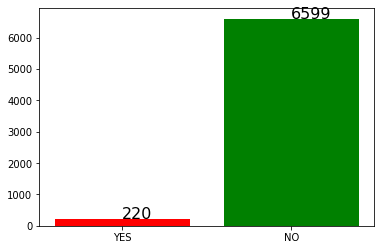

In [13]:
num_yes = len(df_clean[df_clean['Bankrupt?'] == 1])
num_no = len(df_clean[df_clean['Bankrupt?'] == 0])

plt.bar(['YES', 'NO'], [num_yes, num_no], color=['red', 'green'])
add_value_label(['YES', 'NO'], [num_yes, num_no])

In [ ]:
# Further feature analysis

In [15]:
names = list(df_clean)
names

[' CFO to Assets',
 ' Current Liabilities/Equity',
 ' ROA(A) before interest and % after tax',
 ' Total Asset Turnover',
 ' Inventory and accounts receivable/Net value',
 " Net Income to Stockholder's Equity",
 ' Long-term fund suitability ratio (A)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Cash Flow to Total Assets',
 ' Operating profit per person',
 ' Borrowing dependency',
 ' Net profit before tax/Paid-in capital',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Working capitcal Turnover Rate',
 ' Total expense/Assets',
 ' Gross Profit to Sales',
 ' Equity to Long-term Liability',
 ' Retained Earnings to Total Assets',
 ' Realized Sales Gross Profit Growth Rate',
 ' Debt ratio %',
 ' ROA(B) before interest and depreciation after tax',
 ' Cash Reinvestment %',
 ' Net Income to Total Assets',
 ' Total Asset Return Growth Rate Ratio',
 ' Operating Profit Rate',
 ' Liability to Equity',
 ' Cash flow rate',
 ' Persistent EPS in the Last Four Seasons',
 ' Inventory/Working Capital',


In [34]:
features_subset_demo = [' Cash Flow to Total Assets', ' Total Asset Turnover', ' Total expense/Assets', ' Debt ratio %',
                        ' Cash Reinvestment %', ' Net Income to Total Assets', ' Current Assets/Total Assets',
                       ' Cash Flow to Liability', ' Current Liabilities/Liability', ' Net worth/Assets', ' Quick Assets/Total Assets',
                       'Bankrupt?']
len(features_subset_demo)

12

In [35]:
df_1 = df_clean[features_subset_demo]
df_1

,Cash Flow to Total Assets,Total Asset Turnover,Total expense/Assets,Debt ratio %,Cash Reinvestment %,Net Income to Total Assets,Current Assets/Total Assets,Cash Flow to Liability,Current Liabilities/Liability,Net worth/Assets,Quick Assets/Total Assets,Bankrupt?
0,0.637555,0.086957,0.064856,0.207576,0.363725,0.716845,0.190643,0.458609,0.676269,0.792424,0.166673,1
1,0.641100,0.064468,0.025516,0.171176,0.376709,0.795297,0.182419,0.459001,0.308589,0.828824,0.127236,1
2,0.642765,0.014993,0.021387,0.207516,0.368913,0.774670,0.602806,0.459254,0.446027,0.792484,0.340201,1
3,0.579039,0.089955,0.024161,0.151465,0.384077,0.739555,0.225815,0.448518,0.615848,0.848535,0.161575,1
4,0.622374,0.175412,0.026385,0.106509,0.379690,0.795016,0.358380,0.454411,0.975007,0.893491,0.260330,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.639806,0.103448,0.019060,0.124618,0.380155,0.799927,0.578455,0.458639,0.786888,0.875382,0.312840,0
6815,0.642072,0.103448,0.011118,0.099253,0.377389,0.799748,0.444043,0.459058,0.849898,0.900747,0.335085,0
6816,0.631678,0.106447,0.035446,0.038939,0.379392,0.797778,0.496053,0.452465,0.553964,0.961061,0.476747,0
6817,0.684857,0.109445,0.016443,0.086979,0.401028,0.811808,0.564439,0.471313,0.893241,0.913021,0.353624,0


## Spit set into X and Y

In [36]:
attr = features_subset_demo
attr.remove('Bankrupt?')
cl = ['Bankrupt?']

X = df_1[attr]
Y = df_1[cl].to_numpy()

Y = Y.reshape(len(Y))

In [37]:
import tensorflow as tf
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.keras import regularizers

In [38]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [98]:
def nn(X, y, val_ratio=0.3, name='default', lr=0.0001, decay=0.00001):
    global results
    
    # split data
    while True:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = val_ratio) 
        if all(np.unique(y_test, return_counts=True)[1] > 50):
            break
    
    print(f"Distribution for train set: {np.unique(y_train, return_counts=True)} \nDistribution for test set: {np.unique(y_test, return_counts=True)}")
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr, decay=decay)
    
    # model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(4, input_shape=(11,), activity_regularizer=regularizers.L2(0.00001), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Dense(8, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    
#     model.add(tf.keras.layers.Dense(32, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.4))
    
#     model.add(tf.keras.layers.Dense(64, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.4))
    
#     model.add(tf.keras.layers.Dense(128, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    # model.summary()
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['binary_accuracy', 'AUC', precision_m, recall_m, f1_m])
    
    # tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    cl_weights = {1: 6, # int(np.unique(y_test, return_counts=True)[1][0] / np.unique(y_test, return_counts=True)[1][1]) // 3,
                 0: 1} # Bankrupt ratio (1) = 0.04, Non-bankrupt ratio (0) = 0.96. So we set 24x for loss function for class 1

    history = model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test),
                        batch_size=128,
                        epochs=1000,
                        # callbacks=[tensorboard_callback]
                        class_weight=cl_weights
                     )
    
    y_pred = model.predict(X_test)
    # print(np.round(y_pred))
    matrix = confusion_matrix(y_test, np.round(y_pred))
    print("\nConfusion matrix: \n", matrix)
    
    f1 = f1_score(y_test, np.round(y_pred), zero_division=1)
    # results[len(results.items())] = ['Neural_Network' + name, f1, len(y)]
    print("\nF1 Score:", f1)
    return model, history

In [99]:
model_nn, history = nn(X, Y, lr=0.001, decay=0.0001)

Distribution for train set: (array([0, 1], dtype=int64), array([4622,  151], dtype=int64)) 
Distribution for test set: (array([0, 1], dtype=int64), array([1977,   69], dtype=int64))
Epoch 1/1000
38/38 [==============================] - 1s 10ms/step - loss: 0.8044 - binary_accuracy: 0.5162 - auc: 0.4685 - precision_m: 0.0282 - recall_m: 0.4346 - f1_m: 0.0519 - val_loss: 0.6110 - val_binary_accuracy: 0.9663 - val_auc: 0.5614 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.7016 - binary_accuracy: 0.9030 - auc: 0.4921 - precision_m: 0.0231 - recall_m: 0.0509 - f1_m: 0.0268 - val_loss: 0.4786 - val_binary_accuracy: 0.9663 - val_auc: 0.5162 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.6256 - binary_accuracy: 0.9422 - auc: 0.5046 - precision_m: 0.0546 - recall_m: 0.0375 - f1_m:

Epoch 51/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3811 - binary_accuracy: 0.9516 - auc: 0.8491 - precision_m: 0.2340 - recall_m: 0.2604 - f1_m: 0.2115 - val_loss: 0.1731 - val_binary_accuracy: 0.9580 - val_auc: 0.8853 - val_precision_m: 0.3314 - val_recall_m: 0.2668 - val_f1_m: 0.2893
Epoch 52/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3774 - binary_accuracy: 0.9541 - auc: 0.8439 - precision_m: 0.3096 - recall_m: 0.3374 - f1_m: 0.2985 - val_loss: 0.1752 - val_binary_accuracy: 0.9589 - val_auc: 0.8890 - val_precision_m: 0.3990 - val_recall_m: 0.3664 - val_f1_m: 0.3695
Epoch 53/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3697 - binary_accuracy: 0.9531 - auc: 0.8633 - precision_m: 0.2824 - recall_m: 0.3062 - f1_m: 0.2651 - val_loss: 0.1810 - val_binary_accuracy: 0.9560 - val_auc: 0.8891 - val_precision_m: 0.3646 - val_recall_m: 0.3961 - val_f1_m: 0.3658
Epoch 54/1000
38/38 [==============================] - 0s 2ms

38/38 [==============================] - 0s 2ms/step - loss: 0.3185 - binary_accuracy: 0.9474 - auc: 0.9020 - precision_m: 0.2910 - recall_m: 0.4320 - f1_m: 0.3255 - val_loss: 0.1579 - val_binary_accuracy: 0.9438 - val_auc: 0.9029 - val_precision_m: 0.2783 - val_recall_m: 0.4868 - val_f1_m: 0.3419
Epoch 104/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3340 - binary_accuracy: 0.9395 - auc: 0.8866 - precision_m: 0.2733 - recall_m: 0.4993 - f1_m: 0.3431 - val_loss: 0.1499 - val_binary_accuracy: 0.9511 - val_auc: 0.9032 - val_precision_m: 0.3216 - val_recall_m: 0.4659 - val_f1_m: 0.3674
Epoch 105/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.3275 - binary_accuracy: 0.9415 - auc: 0.8965 - precision_m: 0.2748 - recall_m: 0.5040 - f1_m: 0.3315 - val_loss: 0.1582 - val_binary_accuracy: 0.9453 - val_auc: 0.9039 - val_precision_m: 0.2812 - val_recall_m: 0.4763 - val_f1_m: 0.3423
Epoch 106/1000
38/38 [==============================] - 0s 3ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.3170 - binary_accuracy: 0.9415 - auc: 0.8994 - precision_m: 0.2816 - recall_m: 0.4926 - f1_m: 0.3302 - val_loss: 0.1439 - val_binary_accuracy: 0.9477 - val_auc: 0.9039 - val_precision_m: 0.3000 - val_recall_m: 0.4749 - val_f1_m: 0.3551
Epoch 156/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3116 - binary_accuracy: 0.9443 - auc: 0.9059 - precision_m: 0.2806 - recall_m: 0.5369 - f1_m: 0.3368 - val_loss: 0.1527 - val_binary_accuracy: 0.9438 - val_auc: 0.9052 - val_precision_m: 0.2859 - val_recall_m: 0.4931 - val_f1_m: 0.3518
Epoch 157/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3284 - binary_accuracy: 0.9380 - auc: 0.8902 - precision_m: 0.2595 - recall_m: 0.5429 - f1_m: 0.3370 - val_loss: 0.1537 - val_binary_accuracy: 0.9428 - val_auc: 0.9050 - val_precision_m: 0.2821 - val_recall_m: 0.4931 - val_f1_m: 0.3485
Epoch 158/1000
38/38 [==============================] - 0s 2ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.3229 - binary_accuracy: 0.9367 - auc: 0.8977 - precision_m: 0.2429 - recall_m: 0.4505 - f1_m: 0.2989 - val_loss: 0.1534 - val_binary_accuracy: 0.9462 - val_auc: 0.9057 - val_precision_m: 0.2973 - val_recall_m: 0.4931 - val_f1_m: 0.3599
Epoch 208/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3107 - binary_accuracy: 0.9351 - auc: 0.9055 - precision_m: 0.2428 - recall_m: 0.5420 - f1_m: 0.3214 - val_loss: 0.1410 - val_binary_accuracy: 0.9501 - val_auc: 0.9071 - val_precision_m: 0.3156 - val_recall_m: 0.4827 - val_f1_m: 0.3673
Epoch 209/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3189 - binary_accuracy: 0.9384 - auc: 0.8984 - precision_m: 0.2447 - recall_m: 0.4860 - f1_m: 0.3068 - val_loss: 0.1414 - val_binary_accuracy: 0.9497 - val_auc: 0.9084 - val_precision_m: 0.3104 - val_recall_m: 0.4827 - val_f1_m: 0.3650
Epoch 210/1000
38/38 [==============================] - 0s 2ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.3052 - binary_accuracy: 0.9420 - auc: 0.9124 - precision_m: 0.2781 - recall_m: 0.4828 - f1_m: 0.3381 - val_loss: 0.1424 - val_binary_accuracy: 0.9506 - val_auc: 0.9073 - val_precision_m: 0.3260 - val_recall_m: 0.4827 - val_f1_m: 0.3702
Epoch 260/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3090 - binary_accuracy: 0.9407 - auc: 0.9053 - precision_m: 0.2797 - recall_m: 0.4924 - f1_m: 0.3382 - val_loss: 0.1370 - val_binary_accuracy: 0.9526 - val_auc: 0.9047 - val_precision_m: 0.3331 - val_recall_m: 0.4827 - val_f1_m: 0.3781
Epoch 261/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3131 - binary_accuracy: 0.9382 - auc: 0.9044 - precision_m: 0.2967 - recall_m: 0.6033 - f1_m: 0.3701 - val_loss: 0.1448 - val_binary_accuracy: 0.9487 - val_auc: 0.9093 - val_precision_m: 0.3073 - val_recall_m: 0.4827 - val_f1_m: 0.3633
Epoch 262/1000
38/38 [==============================] - 0s 2ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.3122 - binary_accuracy: 0.9443 - auc: 0.9007 - precision_m: 0.2539 - recall_m: 0.4800 - f1_m: 0.3180 - val_loss: 0.1368 - val_binary_accuracy: 0.9536 - val_auc: 0.9092 - val_precision_m: 0.3498 - val_recall_m: 0.4827 - val_f1_m: 0.3845
Epoch 312/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3115 - binary_accuracy: 0.9415 - auc: 0.9045 - precision_m: 0.2649 - recall_m: 0.4863 - f1_m: 0.3289 - val_loss: 0.1414 - val_binary_accuracy: 0.9506 - val_auc: 0.9071 - val_precision_m: 0.3260 - val_recall_m: 0.4827 - val_f1_m: 0.3702
Epoch 313/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3125 - binary_accuracy: 0.9407 - auc: 0.9086 - precision_m: 0.2740 - recall_m: 0.5230 - f1_m: 0.3494 - val_loss: 0.1427 - val_binary_accuracy: 0.9492 - val_auc: 0.9069 - val_precision_m: 0.3104 - val_recall_m: 0.4827 - val_f1_m: 0.3650
Epoch 314/1000
38/38 [==============================] - 0s 2ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.3161 - binary_accuracy: 0.9441 - auc: 0.8997 - precision_m: 0.2925 - recall_m: 0.5465 - f1_m: 0.3594 - val_loss: 0.1403 - val_binary_accuracy: 0.9501 - val_auc: 0.9087 - val_precision_m: 0.3156 - val_recall_m: 0.4827 - val_f1_m: 0.3673
Epoch 364/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3018 - binary_accuracy: 0.9388 - auc: 0.9128 - precision_m: 0.2745 - recall_m: 0.5242 - f1_m: 0.3379 - val_loss: 0.1379 - val_binary_accuracy: 0.9501 - val_auc: 0.9078 - val_precision_m: 0.3156 - val_recall_m: 0.4827 - val_f1_m: 0.3673
Epoch 365/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3159 - binary_accuracy: 0.9382 - auc: 0.9050 - precision_m: 0.2425 - recall_m: 0.4902 - f1_m: 0.3010 - val_loss: 0.1392 - val_binary_accuracy: 0.9492 - val_auc: 0.9090 - val_precision_m: 0.3104 - val_recall_m: 0.4827 - val_f1_m: 0.3650
Epoch 366/1000
38/38 [==============================] - 0s 2ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.2985 - binary_accuracy: 0.9436 - auc: 0.9128 - precision_m: 0.3077 - recall_m: 0.5573 - f1_m: 0.3814 - val_loss: 0.1409 - val_binary_accuracy: 0.9501 - val_auc: 0.9083 - val_precision_m: 0.3156 - val_recall_m: 0.4827 - val_f1_m: 0.3673
Epoch 416/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3197 - binary_accuracy: 0.9386 - auc: 0.8954 - precision_m: 0.2300 - recall_m: 0.4242 - f1_m: 0.2814 - val_loss: 0.1442 - val_binary_accuracy: 0.9506 - val_auc: 0.9109 - val_precision_m: 0.3208 - val_recall_m: 0.4827 - val_f1_m: 0.3700
Epoch 417/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3036 - binary_accuracy: 0.9397 - auc: 0.9104 - precision_m: 0.2492 - recall_m: 0.5041 - f1_m: 0.3114 - val_loss: 0.1403 - val_binary_accuracy: 0.9521 - val_auc: 0.9087 - val_precision_m: 0.3392 - val_recall_m: 0.4827 - val_f1_m: 0.3780
Epoch 418/1000
38/38 [==============================] - 0s 2ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.3213 - binary_accuracy: 0.9455 - auc: 0.8944 - precision_m: 0.3020 - recall_m: 0.4664 - f1_m: 0.3499 - val_loss: 0.1416 - val_binary_accuracy: 0.9511 - val_auc: 0.9067 - val_precision_m: 0.3271 - val_recall_m: 0.4827 - val_f1_m: 0.3735
Epoch 468/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3150 - binary_accuracy: 0.9407 - auc: 0.9027 - precision_m: 0.2735 - recall_m: 0.5609 - f1_m: 0.3461 - val_loss: 0.1399 - val_binary_accuracy: 0.9531 - val_auc: 0.9056 - val_precision_m: 0.3452 - val_recall_m: 0.4827 - val_f1_m: 0.3829
Epoch 469/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3125 - binary_accuracy: 0.9395 - auc: 0.9021 - precision_m: 0.2618 - recall_m: 0.4881 - f1_m: 0.3194 - val_loss: 0.1450 - val_binary_accuracy: 0.9511 - val_auc: 0.9082 - val_precision_m: 0.3271 - val_recall_m: 0.4827 - val_f1_m: 0.3735
Epoch 470/1000
38/38 [==============================] - 0s 2ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.3139 - binary_accuracy: 0.9415 - auc: 0.9055 - precision_m: 0.2780 - recall_m: 0.5505 - f1_m: 0.3464 - val_loss: 0.1432 - val_binary_accuracy: 0.9511 - val_auc: 0.9099 - val_precision_m: 0.3271 - val_recall_m: 0.4827 - val_f1_m: 0.3735
Epoch 520/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3165 - binary_accuracy: 0.9397 - auc: 0.9007 - precision_m: 0.2925 - recall_m: 0.4782 - f1_m: 0.3492 - val_loss: 0.1407 - val_binary_accuracy: 0.9526 - val_auc: 0.9071 - val_precision_m: 0.3437 - val_recall_m: 0.4827 - val_f1_m: 0.3812
Epoch 521/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3213 - binary_accuracy: 0.9380 - auc: 0.8975 - precision_m: 0.2487 - recall_m: 0.4814 - f1_m: 0.3170 - val_loss: 0.1457 - val_binary_accuracy: 0.9511 - val_auc: 0.9092 - val_precision_m: 0.3271 - val_recall_m: 0.4827 - val_f1_m: 0.3735
Epoch 522/1000
38/38 [==============================] - 0s 2ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.2965 - binary_accuracy: 0.9390 - auc: 0.9175 - precision_m: 0.2874 - recall_m: 0.5582 - f1_m: 0.3600 - val_loss: 0.1423 - val_binary_accuracy: 0.9511 - val_auc: 0.9084 - val_precision_m: 0.3271 - val_recall_m: 0.4827 - val_f1_m: 0.3735
Epoch 572/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3039 - binary_accuracy: 0.9378 - auc: 0.9151 - precision_m: 0.2536 - recall_m: 0.5067 - f1_m: 0.3203 - val_loss: 0.1418 - val_binary_accuracy: 0.9511 - val_auc: 0.9092 - val_precision_m: 0.3271 - val_recall_m: 0.4827 - val_f1_m: 0.3735
Epoch 573/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3135 - binary_accuracy: 0.9386 - auc: 0.9011 - precision_m: 0.2567 - recall_m: 0.4860 - f1_m: 0.3202 - val_loss: 0.1409 - val_binary_accuracy: 0.9511 - val_auc: 0.9085 - val_precision_m: 0.3271 - val_recall_m: 0.4827 - val_f1_m: 0.3735
Epoch 574/1000
38/38 [==============================] - 0s 2ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.3149 - binary_accuracy: 0.9392 - auc: 0.9038 - precision_m: 0.2649 - recall_m: 0.4776 - f1_m: 0.3292 - val_loss: 0.1470 - val_binary_accuracy: 0.9501 - val_auc: 0.9092 - val_precision_m: 0.3167 - val_recall_m: 0.4827 - val_f1_m: 0.3685
Epoch 624/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3067 - binary_accuracy: 0.9403 - auc: 0.9110 - precision_m: 0.2712 - recall_m: 0.5560 - f1_m: 0.3445 - val_loss: 0.1411 - val_binary_accuracy: 0.9526 - val_auc: 0.9072 - val_precision_m: 0.3377 - val_recall_m: 0.4722 - val_f1_m: 0.3741
Epoch 625/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3017 - binary_accuracy: 0.9445 - auc: 0.9126 - precision_m: 0.3144 - recall_m: 0.5360 - f1_m: 0.3664 - val_loss: 0.1374 - val_binary_accuracy: 0.9545 - val_auc: 0.9080 - val_precision_m: 0.3504 - val_recall_m: 0.4722 - val_f1_m: 0.3814
Epoch 626/1000
38/38 [==============================] - 0s 2ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.3125 - binary_accuracy: 0.9401 - auc: 0.9074 - precision_m: 0.2841 - recall_m: 0.5604 - f1_m: 0.3457 - val_loss: 0.1410 - val_binary_accuracy: 0.9521 - val_auc: 0.9088 - val_precision_m: 0.3273 - val_recall_m: 0.4722 - val_f1_m: 0.3711
Epoch 676/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3110 - binary_accuracy: 0.9447 - auc: 0.9057 - precision_m: 0.2847 - recall_m: 0.5073 - f1_m: 0.3455 - val_loss: 0.1433 - val_binary_accuracy: 0.9511 - val_auc: 0.9082 - val_precision_m: 0.3214 - val_recall_m: 0.4722 - val_f1_m: 0.3662
Epoch 677/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.2971 - binary_accuracy: 0.9413 - auc: 0.9164 - precision_m: 0.2924 - recall_m: 0.5728 - f1_m: 0.3647 - val_loss: 0.1407 - val_binary_accuracy: 0.9521 - val_auc: 0.9083 - val_precision_m: 0.3273 - val_recall_m: 0.4722 - val_f1_m: 0.3711
Epoch 678/1000
38/38 [==============================] - 0s 2ms/step - los

38/38 [==============================] - 0s 3ms/step - loss: 0.3004 - binary_accuracy: 0.9422 - auc: 0.9088 - precision_m: 0.2994 - recall_m: 0.5306 - f1_m: 0.3585 - val_loss: 0.1381 - val_binary_accuracy: 0.9521 - val_auc: 0.9097 - val_precision_m: 0.3273 - val_recall_m: 0.4722 - val_f1_m: 0.3711
Epoch 728/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3155 - binary_accuracy: 0.9443 - auc: 0.9009 - precision_m: 0.3045 - recall_m: 0.5904 - f1_m: 0.3758 - val_loss: 0.1418 - val_binary_accuracy: 0.9511 - val_auc: 0.9091 - val_precision_m: 0.3211 - val_recall_m: 0.4722 - val_f1_m: 0.3664
Epoch 729/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3035 - binary_accuracy: 0.9405 - auc: 0.9103 - precision_m: 0.2805 - recall_m: 0.5208 - f1_m: 0.3440 - val_loss: 0.1412 - val_binary_accuracy: 0.9516 - val_auc: 0.9072 - val_precision_m: 0.3228 - val_recall_m: 0.4722 - val_f1_m: 0.3679
Epoch 730/1000
38/38 [==============================] - 0s 3ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.3242 - binary_accuracy: 0.9378 - auc: 0.8955 - precision_m: 0.2473 - recall_m: 0.4663 - f1_m: 0.3045 - val_loss: 0.1398 - val_binary_accuracy: 0.9545 - val_auc: 0.9092 - val_precision_m: 0.3504 - val_recall_m: 0.4722 - val_f1_m: 0.3814
Epoch 780/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3094 - binary_accuracy: 0.9436 - auc: 0.9069 - precision_m: 0.2842 - recall_m: 0.4794 - f1_m: 0.3427 - val_loss: 0.1409 - val_binary_accuracy: 0.9536 - val_auc: 0.9095 - val_precision_m: 0.3453 - val_recall_m: 0.4722 - val_f1_m: 0.3776
Epoch 781/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3111 - binary_accuracy: 0.9395 - auc: 0.9053 - precision_m: 0.2503 - recall_m: 0.4705 - f1_m: 0.3092 - val_loss: 0.1402 - val_binary_accuracy: 0.9526 - val_auc: 0.9104 - val_precision_m: 0.3377 - val_recall_m: 0.4722 - val_f1_m: 0.3741
Epoch 782/1000
38/38 [==============================] - 0s 2ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.3056 - binary_accuracy: 0.9371 - auc: 0.9112 - precision_m: 0.2608 - recall_m: 0.5153 - f1_m: 0.3195 - val_loss: 0.1444 - val_binary_accuracy: 0.9506 - val_auc: 0.9083 - val_precision_m: 0.3189 - val_recall_m: 0.4722 - val_f1_m: 0.3650
Epoch 832/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.2998 - binary_accuracy: 0.9401 - auc: 0.9182 - precision_m: 0.2668 - recall_m: 0.4770 - f1_m: 0.3309 - val_loss: 0.1424 - val_binary_accuracy: 0.9516 - val_auc: 0.9091 - val_precision_m: 0.3228 - val_recall_m: 0.4722 - val_f1_m: 0.3679
Epoch 833/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3141 - binary_accuracy: 0.9363 - auc: 0.9019 - precision_m: 0.2411 - recall_m: 0.5230 - f1_m: 0.3164 - val_loss: 0.1437 - val_binary_accuracy: 0.9506 - val_auc: 0.9078 - val_precision_m: 0.3189 - val_recall_m: 0.4722 - val_f1_m: 0.3650
Epoch 834/1000
38/38 [==============================] - 0s 2ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.3058 - binary_accuracy: 0.9401 - auc: 0.9097 - precision_m: 0.2598 - recall_m: 0.5386 - f1_m: 0.3330 - val_loss: 0.1407 - val_binary_accuracy: 0.9521 - val_auc: 0.9083 - val_precision_m: 0.3273 - val_recall_m: 0.4722 - val_f1_m: 0.3711
Epoch 884/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3074 - binary_accuracy: 0.9390 - auc: 0.9068 - precision_m: 0.2455 - recall_m: 0.5024 - f1_m: 0.3167 - val_loss: 0.1385 - val_binary_accuracy: 0.9531 - val_auc: 0.9071 - val_precision_m: 0.3422 - val_recall_m: 0.4722 - val_f1_m: 0.3759
Epoch 885/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.2942 - binary_accuracy: 0.9432 - auc: 0.9176 - precision_m: 0.2414 - recall_m: 0.3854 - f1_m: 0.2842 - val_loss: 0.1382 - val_binary_accuracy: 0.9521 - val_auc: 0.9075 - val_precision_m: 0.3273 - val_recall_m: 0.4722 - val_f1_m: 0.3711
Epoch 886/1000
38/38 [==============================] - 0s 2ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.2963 - binary_accuracy: 0.9413 - auc: 0.9168 - precision_m: 0.2677 - recall_m: 0.5725 - f1_m: 0.3502 - val_loss: 0.1459 - val_binary_accuracy: 0.9501 - val_auc: 0.9044 - val_precision_m: 0.3137 - val_recall_m: 0.4722 - val_f1_m: 0.3626
Epoch 936/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3079 - binary_accuracy: 0.9405 - auc: 0.9076 - precision_m: 0.2694 - recall_m: 0.4930 - f1_m: 0.3333 - val_loss: 0.1442 - val_binary_accuracy: 0.9521 - val_auc: 0.9045 - val_precision_m: 0.3273 - val_recall_m: 0.4722 - val_f1_m: 0.3711
Epoch 937/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3112 - binary_accuracy: 0.9401 - auc: 0.9052 - precision_m: 0.2605 - recall_m: 0.4963 - f1_m: 0.3147 - val_loss: 0.1427 - val_binary_accuracy: 0.9536 - val_auc: 0.9051 - val_precision_m: 0.3453 - val_recall_m: 0.4722 - val_f1_m: 0.3776
Epoch 938/1000
38/38 [==============================] - 0s 2ms/step - los

38/38 [==============================] - 0s 2ms/step - loss: 0.3004 - binary_accuracy: 0.9418 - auc: 0.9170 - precision_m: 0.2447 - recall_m: 0.4174 - f1_m: 0.2990 - val_loss: 0.1417 - val_binary_accuracy: 0.9521 - val_auc: 0.9067 - val_precision_m: 0.3273 - val_recall_m: 0.4722 - val_f1_m: 0.3711
Epoch 988/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3023 - binary_accuracy: 0.9403 - auc: 0.9126 - precision_m: 0.2712 - recall_m: 0.4563 - f1_m: 0.3254 - val_loss: 0.1421 - val_binary_accuracy: 0.9521 - val_auc: 0.9070 - val_precision_m: 0.3273 - val_recall_m: 0.4722 - val_f1_m: 0.3711
Epoch 989/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3027 - binary_accuracy: 0.9430 - auc: 0.9132 - precision_m: 0.2458 - recall_m: 0.4266 - f1_m: 0.3027 - val_loss: 0.1454 - val_binary_accuracy: 0.9511 - val_auc: 0.9077 - val_precision_m: 0.3206 - val_recall_m: 0.4722 - val_f1_m: 0.3665
Epoch 990/1000
38/38 [==============================] - 0s 2ms/step - los

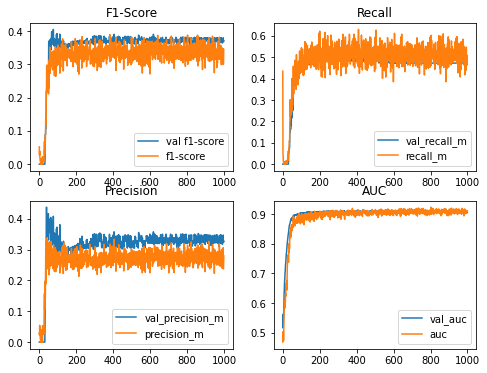

In [100]:
fix, ax = plt.subplots(2, 2, figsize=(8,6))
ax[0, 0].plot(history.history['val_f1_m'])
ax[0, 0].plot(history.history['f1_m'])
ax[0, 0].legend(['val f1-score', 'f1-score'])
ax[0, 0].set_title("F1-Score")

ax[0, 1].plot(history.history['val_recall_m'])
ax[0, 1].plot(history.history['recall_m'])
ax[0, 1].legend(['val_recall_m', 'recall_m'])
ax[0, 1].set_title("Recall")

ax[1, 0].plot(history.history['val_precision_m'])
ax[1, 0].plot(history.history['precision_m'])
ax[1, 0].legend(['val_precision_m', 'precision_m'])
ax[1, 0].set_title("Precision")

ax[1, 1].plot(history.history['val_auc'])
ax[1, 1].plot(history.history['auc'])
ax[1, 1].legend(['val_auc', 'auc'])
ax[1, 1].set_title("AUC")

plt.show()

# SVM

In [144]:
from sklearn import svm

In [164]:
kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

In [173]:
# split data
    while True:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3) 
        if all(np.unique(y_test, return_counts=True)[1] > 50):
            break
    
    print(f"Distribution for train set: {np.unique(y_train, return_counts=True)} \nDistribution for test set: {np.unique(y_test, return_counts=True)}")

Distribution for train set: (array([0, 1], dtype=int64), array([4636,  137], dtype=int64)) 
Distribution for test set: (array([0, 1], dtype=int64), array([1963,   83], dtype=int64))


In [169]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [108]:
y_pred = clf.predict(X_test)

In [112]:
matrix = confusion_matrix(y_test, np.round(y_pred))
print("\nConfusion matrix: \n", matrix)

f1 = f1_score(y_test, np.round(y_pred), zero_division=1)
print("\nF1 Score:", f1)


Confusion matrix: 
 [[1980    0]
 [  66    0]]

F1 Score: 0.0


## Apply weights

In [175]:
cl_weights = {1: 6, 0: 1}

clf = svm.SVC(kernel=kernel_functions[0], class_weight=cl_weights)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, np.round(y_pred))
print("\nConfusion matrix: \n", matrix)

f1 = f1_score(y_test, np.round(y_pred), zero_division=1)
print("\nF1 Score:", f1)


Confusion matrix: 
 [[1939   24]
 [  55   28]]

F1 Score: 0.41481481481481475


# Summary

### Two points to work on in this project:

* Data processing 
    - cleaning
    - normalizing
    - feature selection
    
* Neural Network and SVM comparison
    - linear / non-linear separability
    - hyperparameters and their influence on performance